In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyRegressor
from statsmodels.graphics.regressionplots import abline_plot

%matplotlib inline

In [119]:
df = pd.read_csv('data/kc_house_data.csv')
df.date = pd.to_datetime(df.date)
df.waterfront = df.waterfront.fillna(value = 0)
df = df.drop(columns = ['view','lat', 'long', 'sqft_basement'])
#df.yr_renovated.fillna(value = 0, inplace = True) 
df['yard'] = df.sqft_lot - df.sqft_living
df['ratio_15'] = df.sqft_living/df.sqft_living15
df['years_old'] = 2020 - df.yr_built
s = pd.get_dummies(df.condition, drop_first = True)
df = pd.concat([df, s], axis = 1)
df = df.drop(columns = ['condition'])
df.head()
y = df.price
X = df.drop(columns = ['price'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,zipcode,sqft_living15,sqft_lot15,yard,ratio_15,years_old,2,3,4,5
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,7,...,98178,1340,5650,4470,0.880597,65,0,1,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,7,...,98125,1690,7639,4672,1.520710,69,0,1,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,6,...,98028,2720,8062,9230,0.283088,87,0,1,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,7,...,98136,1360,5000,3040,1.441176,55,0,0,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,8,...,98074,1800,7503,6400,0.933333,33,0,1,0,0


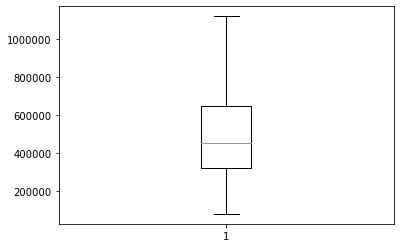

In [80]:
fig, ax = plt.subplots()
ax = plt.boxplot(df.price, showfliers = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,zipcode,sqft_living15,sqft_lot15,yard,ratio_15,years_old,2,3,4,5
12764,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,0.0,12,...,98053,4850,217800,294212,2.791753,21,0,1,0,0
7245,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0.0,13,...,98102,3940,8800,15550,3.058376,110,0,0,1,0
3910,9808700762,2014-06-11,7060000.0,5,4.50,10040,37325,2.0,1.0,11,...,98004,3930,25449,27285,2.554707,80,0,1,0,0
9245,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,0.0,13,...,98039,4540,42730,21484,2.178414,19,0,1,0,0
8085,1924059029,2014-06-17,4670000.0,5,6.75,9640,13068,1.0,1.0,12,...,98040,3270,10454,3428,2.948012,37,0,1,0,0
4407,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0.0,13,...,98039,3560,24345,25869,2.584270,19,0,1,0,0
14542,2303900035,2014-06-11,2890000.0,5,6.25,8670,64033,2.0,0.0,13,...,98177,4140,81021,55363,2.094203,55,0,1,0,0
18288,6072800246,2014-07-02,3300000.0,5,6.25,8020,21738,2.0,0.0,11,...,98006,4160,18969,13718,1.927885,19,0,1,0,0
1162,1247600105,2014-10-20,5110000.0,5,5.25,8010,45517,2.0,1.0,12,...,98033,3430,26788,37507,2.335277,21,0,1,0,0
1446,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0.0,12,...,98004,4600,21750,15985,1.739130,11,0,1,0,0


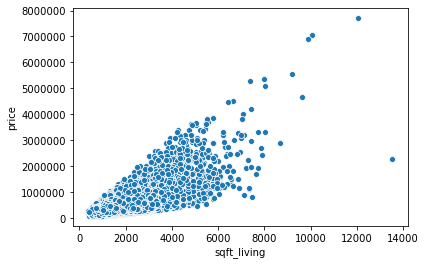

In [121]:


sorted_ = df.sort_values(by = 'sqft_living', ascending = False)
mansions = df[df['price'] > 1500000]

#df.drop(df.index[12764], inplace=True)
fig, ax = plt.subplots()
sns.scatterplot(x = df.sqft_living, y = df.price)

sorted_.head(20)

NoneType

In [107]:
df.sort_values(by = 'bathrooms', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,yr_renovated,sqft_living15,sqft_lot15,yard,ratio_15,years_old,2,3,4,5
7245,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0.0,13,...,1987.0,3940,8800,15550,3.058376,110,0,0,1,0
9245,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,0.0,13,...,0.0,4540,42730,21484,2.178414,19,0,1,0,0
8537,424049043,2014-08-11,450000.0,9,7.50,4050,6504,2.0,0.0,7,...,0.0,1448,3866,2454,2.796961,24,0,1,0,0
4020,9175600025,2014-10-07,800000.0,7,6.75,7480,41664,2.0,0.0,11,...,NaN,2810,33190,34184,2.661922,67,0,1,0,0
8085,1924059029,2014-06-17,4670000.0,5,6.75,9640,13068,1.0,1.0,12,...,2009.0,3270,10454,3428,2.948012,37,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2123039032,2014-10-27,369900.0,1,0.75,760,10079,1.0,1.0,5,...,0.0,1230,14267,9319,0.617886,84,0,0,0,1
12029,2991000160,2014-12-12,312500.0,4,0.50,2300,5570,2.0,0.0,8,...,NaN,1820,6371,3270,1.263736,24,0,1,0,0
10413,7129800036,2015-01-14,109000.0,2,0.50,580,6900,1.0,0.0,5,...,0.0,1570,5040,6320,0.369427,79,0,1,0,0
11662,7987400316,2014-08-14,255000.0,1,0.50,880,1642,1.0,0.0,6,...,0.0,1410,2992,762,0.624113,110,0,1,0,0


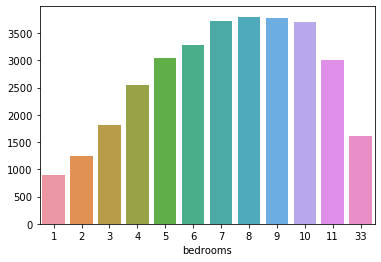

In [95]:
bedrooms_grouped = df.groupby(df['bedrooms'])['sqft_living'].mean()
bedrooms_grouped.index

sns.barplot(x = bedrooms_grouped.index, y = bedrooms_grouped.values)

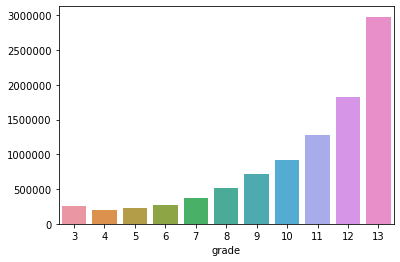

In [115]:
g_grouped = df.groupby(df['grade'])['price'].median()
g_grouped

sns.barplot(x = g_grouped.index, y = g_grouped.values)

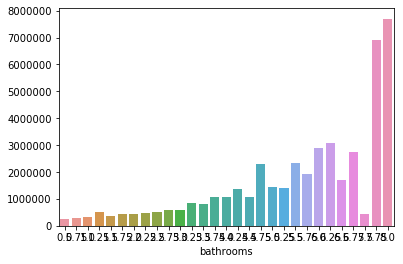

In [111]:
b_grouped = df.groupby(df['bathrooms'])['price'].median()
b_grouped


sns.barplot(x = b_grouped.index, y = b_grouped.values)

In [133]:
z_grouped = df.groupby(df['zipcode'])['price'].median()
z_grouped.sort_values(ascending = False)


#sns.barplot(x = z_grouped.index, y = z_grouped.values)

zipcode
98039    1895000.0
98004    1150000.0
98040     993750.0
98112     915000.0
98005     765475.0
           ...    
98188     264000.0
98001     260000.0
98032     249000.0
98168     235000.0
98002     235000.0
Name: price, Length: 70, dtype: float64

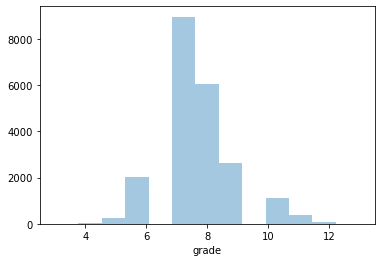

In [104]:
sns.distplot(df.grade, bins = 13, kde = False)

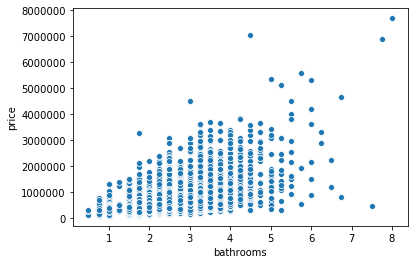

In [108]:
sns.scatterplot(x = df.bathrooms, y= df.price)